In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_covtype
from sklearn.utils import Bunch
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
forest = fetch_covtype(random_state = 33)

In [3]:
data = pd.DataFrame(forest['data'])

In [4]:
feature_names = [
    "Elevation",
    "Aspect",
    "Slope",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_9am",
    "Hillshade_Noon",
    "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points",
]

In [5]:
for i in range(4):
    feature_names.append('Wilderness_Area' + str((i+1)))
    
for i in range(40):
    feature_names.append('Soil_Type' + str((i+1)))

In [6]:
data.set_axis(feature_names, axis=1, inplace=True)

In [7]:
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
target = pd.DataFrame(forest['target'])

In [9]:
target

,0
0,5
1,5
2,2
3,2
4,5
...,...
581007,3
581008,3
581009,3
581010,3


#### Проведем  EDA

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area1                    581012 non-null  float64
 11  Wilderness_Area2          

Пропусков данных нет. Очевидных выбросов тоже нет, вприниципе все данные корректные, однако вызывает сомнения отрицательные значения стоблца Vertical_Distance_To_Hydrology, вероятнее всего в данном случае имеются ввиду подземные источники.

In [94]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Выберем признаки на основе "корреляция признаков (на основе матрицы корреляции) и отбор по величине корреляции". При этом исключим категориальные переменные Wilderness_Area и Soil_type.

<AxesSubplot:>

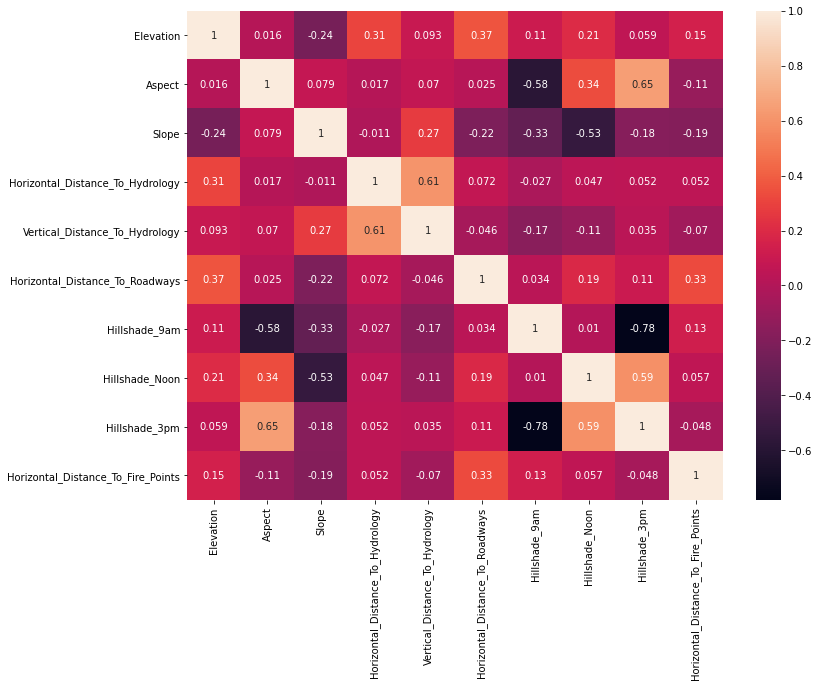

In [95]:
corr = data.iloc[:, 0:10].corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr, annot = True)

Оставим все признаки с коэффициентом корреляции >0.5 (положительная) или < -0.5 (отрицательная)

In [11]:
feature_correlation = ['Aspect', 'Slope', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']

Horizontal_Distance_To_Hydrology и Vertical_Distance_To_Hydrology хоть и имеют коэффициент корреляции 0.61, их тоже исключим, поскольку данный коэффициент они имеют между собой, а не с какими-либо признаком. 

Для сравнения точности классификации будем использовать модель на основе деревьев решений

In [12]:
def get_score(X,y, random_seed = 42):
    model =  DecisionTreeClassifier()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)  
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [13]:
get_score(data[feature_correlation], target)

0.4716759225261612

Выберем признаки на основе WoE & IV. 

In [14]:
def woe_iv (data, feature, target):
    temp = []
    for i in range(data[feature].nunique()):
        value = list(data[feature].unique())[i]
        temp.append({
            'Value': value,
            'All': data[data[feature] == value].count()[feature],
            'Good': data[(data[feature] == value) & (data[target] == 1)].count()[feature],
            'Bad': data[(data[feature] == value) & (data[target] != 1)].count()[feature]         
        })
        
    df = pd.DataFrame(temp)
    df['Distr_good'] = df['Good']/df['Good'].sum()
    df['Distr_bad'] = df['Bad']/df['Bad'].sum()
    df['WoE'] = np.log(df['Dist_good']/df['Distr_bad'])
    df = df.replace({'Woe' : {np.inf: 0, -np.inf: 0}})
    df['IV'] = (df['Distr_good']-df['Distr_bad'])*df['WoE']
    
    iv = df['IV'].sum()
    woe = df.sort_values(by = 'WoE')
    
    return woe, iv

In [15]:
woe_iv(data, 'Elevation', target)

MemoryError: Unable to allocate 2.46 TiB for an array with shape (581012, 581012) and data type float64

Отбор признаков на основе feature_impotance от алгоритма RandomForest

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state = 42)  
forest = RandomForestClassifier(random_state = 22)
forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=22)

<AxesSubplot:>

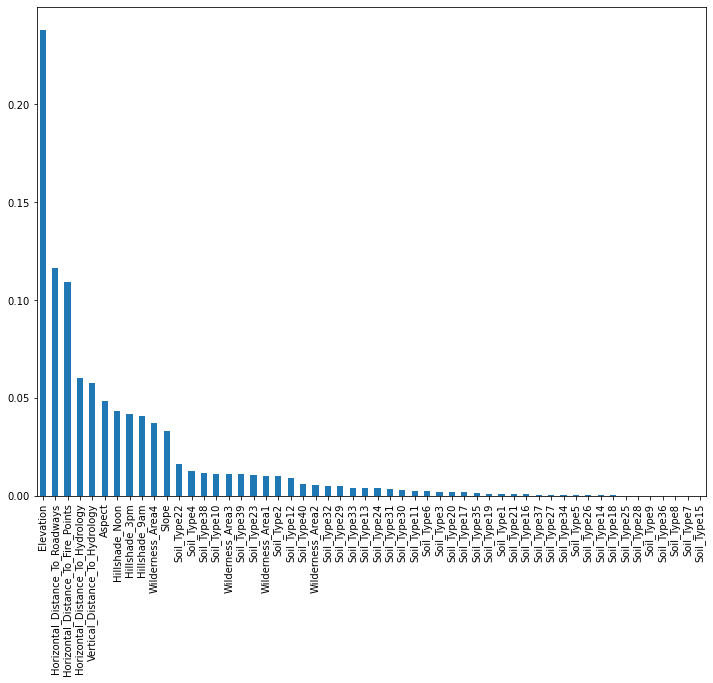

In [31]:
plt.figure(figsize=(12,9))
forest_importances = pd.Series(forest.feature_importances_, index = feature_names)
forest_importances.sort_values(ascending = False).plot.bar()

Возьмем признаки до soil_type22

In [64]:
forest_importances_features = forest_importances.sort_values(ascending = False).iloc[0:12].index.tolist()

In [65]:
forest_importances_features

['Elevation',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Aspect',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Hillshade_9am',
 'Wilderness_Area4',
 'Slope',
 'Soil_Type22']

In [67]:
get_score(data[forest_importances_features], target)

0.9139147695979438

Жадный отбор признаков по максимальному нарастанию качества модели

In [114]:
score_default_addition = 0
i = 2
for _ in range(52):
    temp_score = get_score(data[feature_names[0:i]], target)
    if temp_score > score_default_addition:
        score_default_addition = temp_score
        i += 1
    else:
        print(f'количество циклов отбора: {_}\nfeature_used: {feature_names[0:i]}\nscore: {temp_score}')
        break

количество циклов отбора: 5
feature_used: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am']
score: 0.8589246374150908


Жадное отбрасывание признаков по минимальному падению качества модели

In [116]:
score_default_removing = 0
i = 54
for _ in range(54):
    temp_score = get_score(data[feature_names[0:i]], target)
    if temp_score > score_default_addition:
        score_default_removing = temp_score
        i -= 1
    else:
        print(f'количество циклов отбора: {_}\nfeature_used: {feature_names[0:i]}\nscore: {temp_score}')
        break

количество циклов отбора: 45
feature_used: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']
score: 0.8545931246557739


In [74]:
feature_names

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

In [71]:
data[['Elevation', 'Aspect']]

,Elevation,Aspect
0,2596.0,51.0
1,2590.0,56.0
2,2804.0,139.0
3,2785.0,155.0
4,2595.0,45.0
...,...,...
581007,2396.0,153.0
581008,2391.0,152.0
581009,2386.0,159.0
581010,2384.0,170.0


In [72]:
get_score(data[['Elevation', 'Aspect']], target)

0.5891775289149991

жадное отбрасывание признаков по минимальному падению качества модели

In [153]:
target_class = {
    '1': 'Spruce/Fir',
    '2': 'Lodgepole Pine',
    '3': 'Ponderosa Pine',
    '4': 'Cottonwood/Willow',
    '5': 'Aspen',
    '6': 'Douglas-fir',
    '7': 'Krummholz'   
}

wilderness_areas = {
    'Wilderness_Area1': 'Rawah',
    'Wilderness_Area2': 'Neota',
    'Wilderness_Area3': 'Comanche Peak',
    'Wilderness_Area4': 'Cache la Poudre'   
}

soil_type = {
'Soil_Type1' : 'Cathedral family - Rock outcrop complex, extremely stony.',
'Soil_Type2' : 'Vanet - Ratake families complex, very stony.',
'Soil_Type3' : 'Haploborolis - Rock outcrop complex, rubbly.',
'Soil_Type4' : 'Ratake family - Rock outcrop complex, rubbly.',
'Soil_Type5' : 'Vanet family - Rock outcrop complex complex, rubbly.',
'Soil_Type6' : 'Vanet - Wetmore families - Rock outcrop complex, stony.',
'Soil_Type7' : 'Gothic family.',
'Soil_Type8' : 'Supervisor - Limber families complex.',
'Soil_Type9' : 'Troutville family, very stony.',
'Soil_Type10' : 'Bullwark - Catamount families - Rock outcrop complex, rubbly.',
'Soil_Type11' : 'Bullwark - Catamount families - Rock land complex, rubbly.',
'Soil_Type12' : 'Legault family - Rock land complex, stony.',
'Soil_Type13' : 'Catamount family - Rock land - Bullwark family complex, rubbly.',
'Soil_Type14' : 'Pachic Argiborolis - Aquolis complex.',
'Soil_Type15' : 'unspecified in the USFS Soil and ELU Survey.',
'Soil_Type16' : 'Cryaquolis - Cryoborolis complex.',
'Soil_Type17' : 'Gateview family - Cryaquolis complex.',
'Soil_Type18' : 'Rogert family, very stony.',
'Soil_Type19' : 'Typic Cryaquolis - Borohemists complex.',
'Soil_Type20' : 'Typic Cryaquepts - Typic Cryaquolls complex.',
'Soil_Type21' : 'Typic Cryaquolls - Leighcan family, till substratum complex.',
'Soil_Type22' : 'Leighcan family, till substratum, extremely bouldery.',
'Soil_Type23' : 'Leighcan family, till substratum - Typic Cryaquolls complex.',
'Soil_Type24' : 'Leighcan family, extremely stony.',
'Soil_Type25' : 'Leighcan family, warm, extremely stony.',
'Soil_Type26' : 'Granile - Catamount families complex, very stony.',
'Soil_Type27' : 'Leighcan family, warm - Rock outcrop complex, extremely stony.',
'Soil_Type28' : 'Leighcan family - Rock outcrop complex, extremely stony.',
'Soil_Type29' : 'Como - Legault families complex, extremely stony.',
'Soil_Type30' : 'Como family - Rock land - Legault family complex, extremely stony.',
'Soil_Type31' : 'Leighcan - Catamount families complex, extremely stony.',
'Soil_Type32' : 'Catamount family - Rock outcrop - Leighcan family complex, extremely stony.',
'Soil_Type33' : 'Leighcan - Catamount families - Rock outcrop complex, extremely stony.',
'Soil_Type34' : 'Cryorthents - Rock land complex, extremely stony.',
'Soil_Type35' : 'Cryumbrepts - Rock outcrop - Cryaquepts complex.',
'Soil_Type36' : 'Bross family - Rock land - Cryumbrepts complex, extremely stony.',
'Soil_Type37' : 'Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.',
'Soil_Type38' : 'Leighcan - Moran families - Cryaquolls complex, extremely stony.',
'Soil_Type39' : 'Moran family - Cryorthents - Leighcan family complex, extremely stony.',
'Soil_Type40' : 'Moran family - Cryorthents - Rock land complex, extremely stony.'
}


